In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import scipy.stats as sts

# linear regression lib
import statsmodels.api as smapi

# ANOVA test
from statsmodels.formula.api import ols

# split the data into train/test in the reqd %
# KFold -> k-fold cross validation
from sklearn.model_selection import train_test_split,KFold

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature selection
from sklearn.feature_selection import f_regression

# MSE
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:
from sklearn.feature_selection import f_classif


In [7]:
path = "C:/Users/Ansari Aaquib/Downloads/drive-download-20210519T143124Z-001/Logistics Regression/bankchurn1.csv"

In [8]:
bank = pd.read_csv(path)

In [9]:
bank.head()

,custid,surname,creditscore,country,gender,age,tenure,balance,active,salary,churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,0


In [10]:
bank.shape

(10000, 11)

In [11]:
bank.tail()

,custid,surname,creditscore,country,gender,age,tenure,balance,active,salary,churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,0,38190.78,0


In [12]:
bank.columns

Index(['custid', 'surname', 'creditscore', 'country', 'gender', 'age',
       'tenure', 'balance', 'active', 'salary', 'churn'],
      dtype='object')

In [13]:
bank.isnull().sum()

custid         0
surname        0
creditscore    0
country        0
gender         0
age            0
tenure         0
balance        0
active         0
salary         0
churn          0
dtype: int64

In [14]:
bank.drop(columns=['custid', 'surname',], inplace=True)

In [15]:
bank.columns

Index(['creditscore', 'country', 'gender', 'age', 'tenure', 'balance',
       'active', 'salary', 'churn'],
      dtype='object')

In [16]:
bank.dtypes

creditscore      int64
country         object
gender          object
age              int64
tenure           int64
balance        float64
active           int64
salary         float64
churn            int64
dtype: object

In [17]:
bank.churn.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='churn', ylabel='count'>

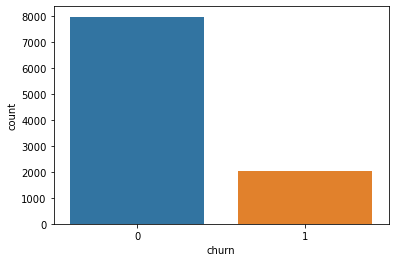

In [18]:
sns.countplot(x='churn',data=bank)

In [19]:
from pylab import rcParams
rcParams ['figure.figsize'] = 18,10

In [20]:
bank.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creditscore  10000 non-null  int64  
 1   country      10000 non-null  object 
 2   gender       10000 non-null  object 
 3   age          10000 non-null  int64  
 4   tenure       10000 non-null  int64  
 5   balance      10000 non-null  float64
 6   active       10000 non-null  int64  
 7   salary       10000 non-null  float64
 8   churn        10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [22]:
nc = bank.select_dtypes(exclude='object').columns.values

In [23]:
fc = bank.select_dtypes(include='object').columns.values

In [24]:
for c in fc:
    print('columns = ',c)
    print(bank[c].unique())
    print('-----')

columns =  country
['France' 'Spain' 'Germany']
-----
columns =  gender
['Female' 'Male']
-----


In [25]:
bank_new = bank.copy()

In [26]:
bank[fc][bank[fc]==0].count()

country    0
gender     0
dtype: int64

In [27]:
for c in fc:
    dummy = pd.get_dummies(bank_new[c],drop_first=True,prefix=c)
    bank_new = bank_new.join(dummy)

In [28]:
bank_new.columns

Index(['creditscore', 'country', 'gender', 'age', 'tenure', 'balance',
       'active', 'salary', 'churn', 'country_Germany', 'country_Spain',
       'gender_Male'],
      dtype='object')

In [29]:
bank_new.drop(columns=fc,inplace=True)


In [30]:
bank_new.columns


Index(['creditscore', 'age', 'tenure', 'balance', 'active', 'salary', 'churn',
       'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')

In [51]:
def splitdata(data,y,ratio=0.3):
    trainx,testx,trainy,testy = train_test_split(data.drop(y,1),data[y],test_size=0.3)
    
    
    return(trainx,trainy,testx,testy)
    










In [52]:
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

(7000, 9) (7000,) (3000, 9) (3000,)


In [ ]:
def buildmodel(trainx,trainy):
    model =  smapi.Logit(trainy,trainx).fit()
    return(model)


trainx1,trainy1,testx1,testy1 = splitdata(bank_new,'churn')
(trainx1.shape,trainy1.shape,testx1.shape,testy1.shape)


def predtoclass(preds,cutoff):
    p = preds.copy()
    p[p < cutoff] = 0
    p[p > cutoff] = 1
    
    return(p.astype(int))








In [54]:
m1 = buildmodel(trainx1,trainy1)

Optimization terminated successfully.
         Current function value: 0.442741
         Iterations 6


In [55]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.1248
Time:                        17:22:05   Log-Likelihood:                -3099.2
converged:                       True   LL-Null:                       -3541.3
Covariance Type:            nonrobust   LLR p-value:                1.449e-185
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
creditscore        -0.0042      0.000    -20.733      0.000      -0.005      -0.004
age                 0.0546      0.003     19.911      0.000       0.049       0.060
tenure             -0.0474      0.011     -4.419      0.000      -0.068      -0.026
balance          1.401e-06   5.73e-07      2.444      0.015    2.77e-07    2.52e-06
active             -1.0842      0.067    -16.167      0.000      -1.216      -0.953
salary          -1.474e-06    5.4e-07     -2.729      0.006   -2.53e-06   -4.16e-07
country_Germany     0.7603      0.079      9.570      0.000       0.605       0.916
country_Spain      -0.1204      0.083     -1.446      0.148      -0.284       0.043
gender_Male        -0.6179      0.063     -9.768      0.000      -0.742      -0.494
===================================================================================
"""

In [56]:
p1 = m1.predict(testx1)

In [57]:
print(p1[0:10])

2190    0.694112
2304    0.061406
7560    0.202804
7163    0.074367
4219    0.215248
9814    0.180010
3409    0.591119
5702    0.174770
3009    0.067998
1177    0.098380
dtype: float64


p < 0.05 --> 0
p > 0.05 --> 1

In [58]:
p1_copy = p1.copy()

In [59]:
p1_copy[p1_copy < 0.5]  = 0
p1_copy[p1_copy > 0.5]  = 1

In [60]:
print(p1_copy)

2190    1.0
2304    0.0
7560    0.0
7163    0.0
4219    0.0
       ... 
9245    0.0
8846    1.0
6034    0.0
3154    0.0
3494    0.0
Length: 3000, dtype: float64


In [61]:
def predtoclass(preds,cutoff):
    p = preds.copy()
    p[p < cutoff] = 0
    p[p > cutoff] = 1
    
    return(p.astype(int))

In [62]:
pred1 = predtoclass(p1,0.5)

In [63]:
pred1[0:10]

2190    1
2304    0
7560    0
7163    0
4219    0
9814    0
3409    1
5702    0
3009    0
1177    0
dtype: int32

# evaluting the model

# Confusion matrix


In [64]:
confusion_matrix(testy,pred1)

array([[2287,  144],
       [ 522,   47]], dtype=int64)

In [65]:
classification_report(testy1,pred1)

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.89      2391\n           1       0.63      0.20      0.30       609\n\n    accuracy                           0.81      3000\n   macro avg       0.73      0.58      0.60      3000\nweighted avg       0.79      0.81      0.77      3000\n'

In [79]:
# confusion matrix, classification report, ROC curve
def cm(actual,predicted):
    # cross tab method
    df1 = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df1.actual,df1.predicted,margins=True))
    
    # classification report
    print(classification_report(actual,predicted))
    
    fpr,tpr,_ = metrics.roc_curve(actual,predicted)
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.title('ROC')
    plt.plot(fpr,tpr,'b',label='AUC={}%'.format(round(roc_auc*100,3))) 
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('1- False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend
    
    
    

In [70]:
cm(testy1,pred1)

predicted     0    1   All
actual                    
0          2320   71  2391
1           489  120   609
All        2809  191  3000
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2391
           1       0.63      0.20      0.30       609

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



In [71]:
from sklearn import metrics

In [81]:
def cm(actual,predicted):
    # cross tab method
    df1 = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df1.actual,df1.predicted,margins=True))
    
    # classification report
    print(classification_report(actual,predicted))
    
    fpr,tpr,_ = metrics.roc_curve(actual,predicted)
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.title('ROC')
    plt.plot(fpr,tpr,'b',label='AUC={}%'.format(round(roc_auc*100,3))) 
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('1- False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend
    
    

predicted     0    1   All
actual                    
0          2203  188  2391
1           406  203   609
All        2609  391  3000
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2391
           1       0.52      0.33      0.41       609

    accuracy                           0.80      3000
   macro avg       0.68      0.63      0.64      3000
weighted avg       0.78      0.80      0.78      3000



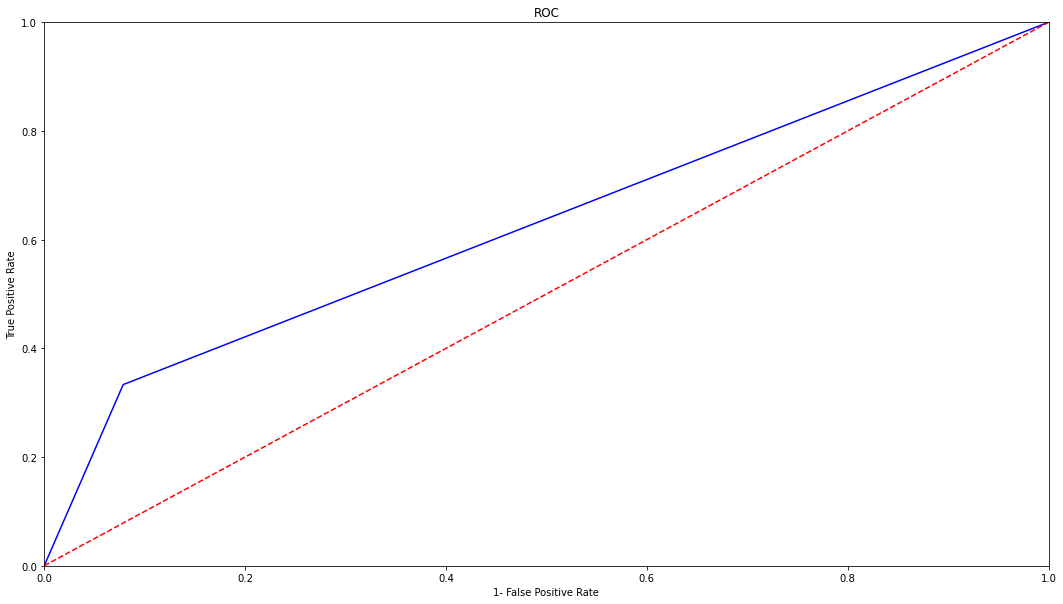

In [83]:
cutoff = 0.4
p1 =  m1.predict(testx1)
pred1 = predtoclass(p1,cutoff)
cm(testy1,pred1)

cutoff = 0.25
p1 =  m1.predict(testx1)
pred1 = predtoclass(p1,cutoff)
cm(testy1,pred1)

# Over Sampling 

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE()
chx,chy = sm.fit_resample(bank_new.drop('churn',1),bank_new.churn)

# model 2


In [90]:
bank_new2 = chx.join(chy)
len(bank_new2)

15926

# check  the count of classes (y)

In [91]:
bank_new2.churn.value_counts()

0    7963
1    7963
Name: churn, dtype: int64

# Build and predict model 2

In [92]:
trainx2,trainy2,testx2,testy2 = splitdata(bank_new2,'churn')
(trainx2.shape,trainy2.shape,testx2.shape,testy2.shape)

m2 = buildmodel(trainx2,trainy2)


Optimization terminated successfully.
         Current function value: 0.485874
         Iterations 6


In [93]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11139
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.2990
Time:                        19:17:19   Log-Likelihood:                -5416.5
converged:                       True   LL-Null:                       -7727.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
creditscore        -0.0026      0.000    -16.315      0.000      -0.003      -0.002
age                 0.0776      0.002     33.655      0.000       0.073       0.082
tenure             -0.0697      0.009     -8.132      0.000      -0.086      -0.053
balance          4.227e-06   4.11e-07     10.274      0.000    3.42e-06    5.03e-06
active             -1.8998      0.052    -36.655      0.000      -2.001      -1.798
salary          -8.496e-07   4.04e-07     -2.104      0.035   -1.64e-06   -5.82e-08
country_Germany     0.0608      0.060      1.018      0.309      -0.056       0.178
country_Spain      -1.1114      0.068    -16.303      0.000      -1.245      -0.978
gender_Male        -1.3567      0.048    -28.021      0.000      -1.452      -1.262
===================================================================================
"""

# Predict on the test data

predicted     0     1   All
actual                     
0          1792   632  2424
1           529  1825  2354
All        2321  2457  4778
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2424
           1       0.74      0.78      0.76      2354

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



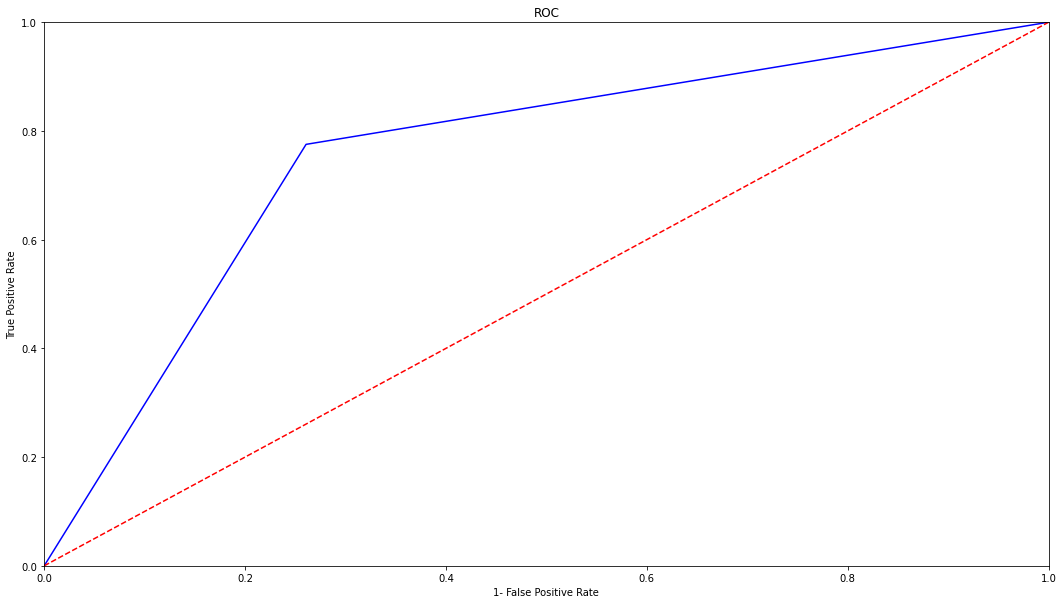

In [94]:
cutoff = 0.5
p2 =  m2.predict(testx2)
pred2 = predtoclass(p2,cutoff)
cm(testy2,pred2)

# Evaluating the model

predicted     0     1   All
actual                     
0          1792   632  2424
1           529  1825  2354
All        2321  2457  4778
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2424
           1       0.74      0.78      0.76      2354

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



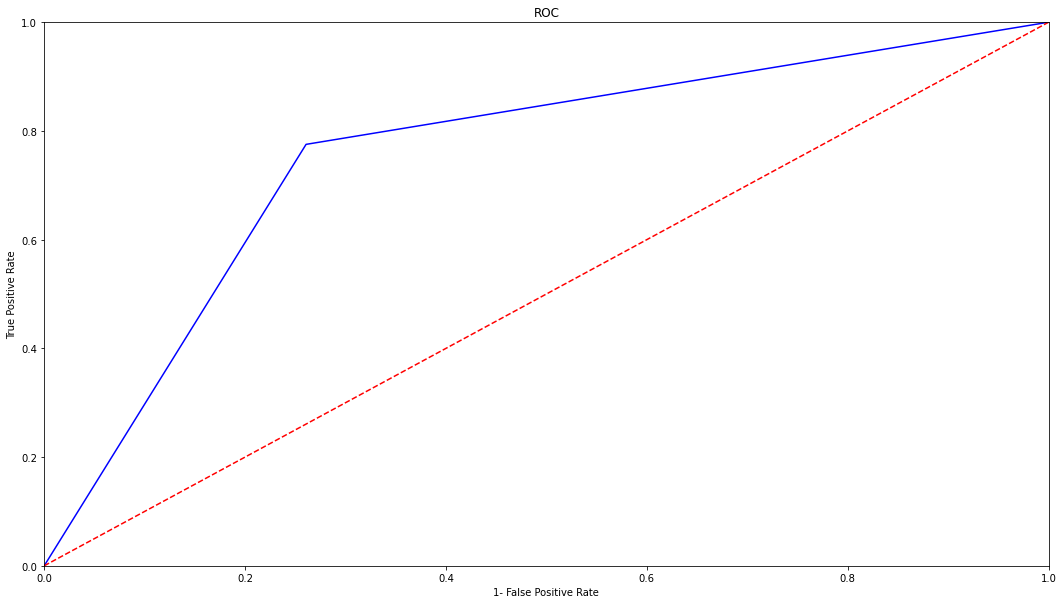

In [95]:
cm(testy2,pred2)

# Undersampling

In [96]:
from imblearn.under_sampling import NearMiss

In [97]:
nm = NearMiss()


In [98]:
chx,chy = nm.fit_resample(bank_new.drop('churn',1),bank_new.churn)

# Model 3

In [99]:
bank_new3 = chx.join(chy)
len(bank_new3)

4074

# check the count of classes (y)

In [100]:
bank_new3.churn.value_counts()

0    2037
1    2037
Name: churn, dtype: int64

# Build and predict model 3

In [101]:
trainx3,trainy3,testx3,testy3 = splitdata(bank_new3,'churn')
(trainx3.shape,trainy3.shape,testx3.shape,testy3.shape)

m3 = buildmodel(trainx3,trainy3)


Optimization terminated successfully.
         Current function value: 0.275356
         Iterations 12


# Summarise the model

In [102]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2842
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.6027
Time:                        19:29:20   Log-Likelihood:                -785.04
converged:                       True   LL-Null:                       -1976.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
creditscore        -0.0044      0.000    -10.733      0.000      -0.005      -0.004
age                 0.0614      0.006     11.068      0.000       0.051       0.072
tenure             -0.0534      0.022     -2.460      0.014      -0.096      -0.011
balance             0.0001   2.26e-05      5.155      0.000    7.22e-05       0.000
active             -0.9854      0.134     -7.331      0.000      -1.249      -0.722
salary          -7.555e-07   1.08e-06     -0.700      0.484   -2.87e-06    1.36e-06
country_Germany    -4.4965      2.015     -2.232      0.026      -8.446      -0.547
country_Spain      -0.1373      0.139     -0.991      0.322      -0.409       0.134
gender_Male        -0.5284      0.126     -4.188      0.000      -0.776      -0.281
===================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Predict on test data

predicted    0    1   All
actual                   
0          580   18   598
1          149  476   625
All        729  494  1223
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       598
           1       0.96      0.76      0.85       625

    accuracy                           0.86      1223
   macro avg       0.88      0.87      0.86      1223
weighted avg       0.88      0.86      0.86      1223



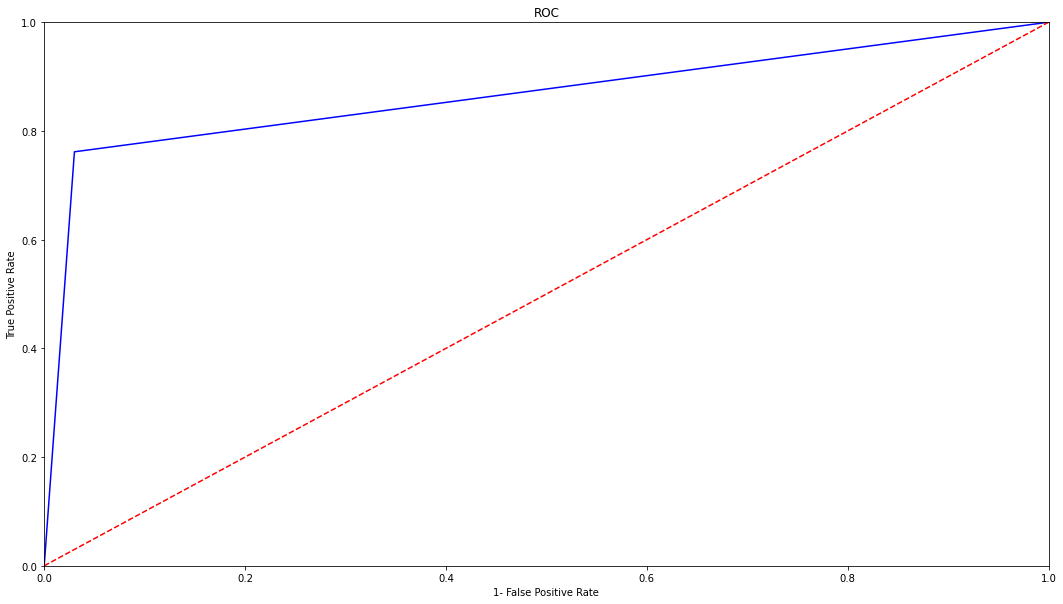

In [103]:
cutoff = 0.5
p3 =  m3.predict(testx3)
pred3 = predtoclass(p3,cutoff)
cm(testy3,pred3)

# Evaluting the model

predicted    0    1   All
actual                   
0          580   18   598
1          149  476   625
All        729  494  1223
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       598
           1       0.96      0.76      0.85       625

    accuracy                           0.86      1223
   macro avg       0.88      0.87      0.86      1223
weighted avg       0.88      0.86      0.86      1223



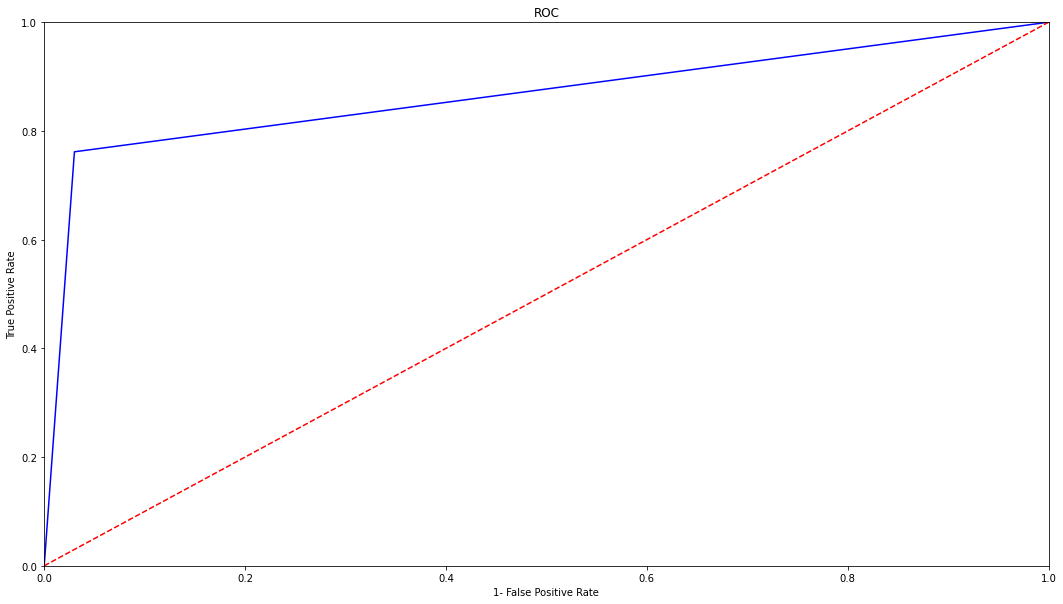

In [104]:
cm(testy3,pred3)

# Hybrid / Balance model

In [114]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [108]:
prec = 0.75 


In [110]:
oversamp = SMOTE(sampling_strategy = prec)
undersamp = RandomUnderSampler(sampling_strategy=prec)

In [111]:
steps = [('o',oversamp),('u',undersamp)]


In [115]:
chx,chy = Pipeline(steps=steps).fit_resample(bank_new.drop('churn',1),bank_new.churn)


In [116]:
# dataset for model 4
bank_new4 = chx.join(chy)
len(bank_new4)



13934

#  check the count of the classes (Y)


In [117]:
bank_new4.churn.value_counts()


0    7962
1    5972
Name: churn, dtype: int64

# build and predict M4

In [124]:

# build and predict M4
trainx4,trainy4,testx4,testy4 = splitdata(bank_new4,'churn')
(trainx4.shape,trainy4.shape,testx4.shape,testy4.shape)

m4 = buildmodel(trainx4,trainy4)



Optimization terminated successfully.
         Current function value: 0.500411
         Iterations 6


# summarise the model

In [119]:
m4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9753
Model:                          Logit   Df Residuals:                     9744
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.2591
Time:                        19:42:55   Log-Likelihood:                -4927.4
converged:                       True   LL-Null:                       -6651.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
creditscore        -0.0031      0.000    -18.884      0.000      -0.003      -0.003
age                 0.0749      0.002     31.248      0.000       0.070       0.080
tenure             -0.0593      0.009     -6.690      0.000      -0.077      -0.042
balance           4.06e-06   4.27e-07      9.502      0.000    3.22e-06     4.9e-06
active             -1.7019      0.054    -31.440      0.000      -1.808      -1.596
salary          -7.388e-07    4.2e-07     -1.761      0.078   -1.56e-06    8.35e-08
country_Germany     0.0627      0.062      1.014      0.311      -0.059       0.184
country_Spain      -0.9290      0.070    -13.311      0.000      -1.066      -0.792
gender_Male        -1.2685      0.051    -25.097      0.000      -1.368      -1.169
===================================================================================
"""

# predict on the test data

In [125]:
cutoff = 0.5
p4 = m4.predict(testx4)
pred4 = predtoclass(p4,cutoff)


# evaluating the model

predicted     0     1   All
actual                     
0          1854   503  2357
1           510  1314  1824
All        2364  1817  4181
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2357
           1       0.72      0.72      0.72      1824

    accuracy                           0.76      4181
   macro avg       0.75      0.75      0.75      4181
weighted avg       0.76      0.76      0.76      4181



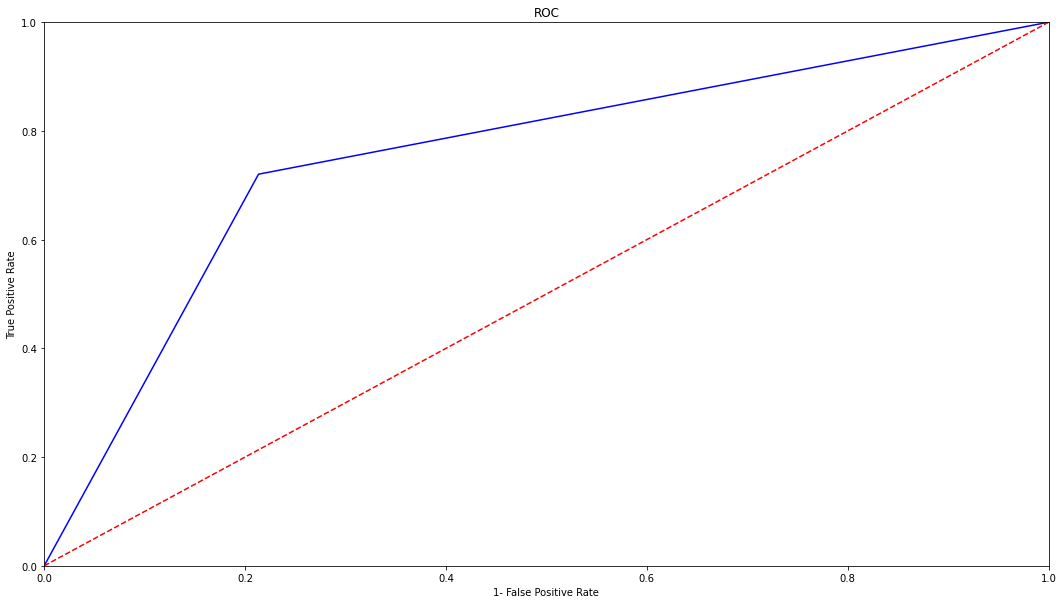

In [123]:

# evaluating the model
cm(testy4,pred4)